In [59]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_json('ecommerce-events.ndjson', lines=True)

In [3]:
df.head(1)

,browserType,browserVersion,category,date,deviceType,eventType,order,orderItems,osType,osVersion,...,referrer,referrerType,searchItems,status,tags,url,utm_campaign,utm_medium,utm_source,visitor
0,Firefox,52.0.0,271|697,2017-06-03 00:07:04,desktop,page,NaN,NaN,Windows,None,...,5af64abc7cb3e5a8be6d22c97331b9afcaad91c5,social,NaN,NaN,NaN,ccde1b63b365cad611f2d1a6fca8a15b0e71d6ef,Campaign_2,Medium_2,Partner_1,89206c00-3f26-11e7-9978-fdec7f5865bc


# 1. What was the total revenue?

In [4]:
transactions = df[df.eventType=='transaction']

In [5]:
transactions.head(1)

,browserType,browserVersion,category,date,deviceType,eventType,order,orderItems,osType,osVersion,...,referrer,referrerType,searchItems,status,tags,url,utm_campaign,utm_medium,utm_source,visitor
691501,Chrome,58.0.3029,None,2017-06-03 06:19:08,desktop,transaction,5258.0,"[{'product': 6461, 'price': 467.91, 'quantity'...",Windows,None,...,6e03ee62984224d0c0f08d4b68b819297d7f4d14,None,NaN,NaN,NaN,88ec4ebe923107cfcd385160d1d7d5c4121f8077,None,None,None,0f0b47a0-f5a3-11e5-b7a4-4ff0e59e724a


In [6]:
df_items = []

In [7]:
df_items

[]

In [12]:
items = transactions.orderItems

In [13]:
for item in items:
    for i in item:
        df_items.append(i)

In [14]:
df_items = pd.DataFrame(df_items)

In [15]:
df_items.head()

,price,product,quantity
0,467.91,6461,2.0
1,30.27,19168,10.0
2,30.87,18143,22.0
3,59.67,19925,2.0
4,129.90,38,1.0


In [16]:
df_items['total'] = df_items.price * df_items.quantity

In [17]:
df_items.head()

,price,product,quantity,total
0,467.91,6461,2.0,935.82
1,30.27,19168,10.0,302.70
2,30.87,18143,22.0,679.14
3,59.67,19925,2.0,119.34
4,129.90,38,1.0,129.90


In [18]:
df_items.total.sum()

212022.27000000002

# 2. What percentage of visitors used a mobile device?

In [21]:
perc = (len(df[df.deviceType == 'mobile']) / len(df)) * 100

In [22]:
perc

41.52242235082472

# 3. What search query had the highest click-through rate?


# 4. When is the site most busy?

In [62]:
time = df.date.apply(lambda x: x.time())

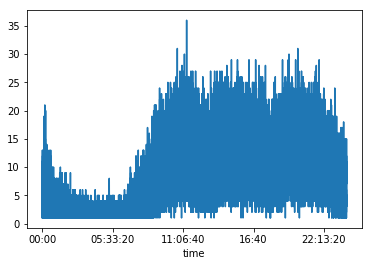

In [67]:
time.value_counts().plot()

In [71]:
nu_weekday = df.date.apply(lambda x: x.weekday())

In [73]:
nu_weekday.head()

0    5
1    5
2    5
3    5
4    5
Name: date, dtype: int64

In [75]:
weekdays = []
for n in nu_weekday:
    if n==0:
        weekday = 'monday'
    if n==1:
        weekday = 'tuesday'
    if n==2:
        weekday = 'wednesday'
    if n==3:
        weekday = 'thursday'
    if n==4:
        weekday = 'friday'
    if n==5:
        weekday = 'saturday'
    if n==6:
        weekday = 'sunday'
    weekdays.append(weekday)

In [77]:
df['weekday'] = weekdays

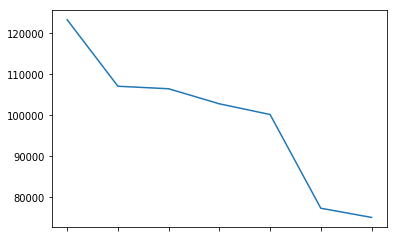

In [80]:
df.weekday.value_counts().plot()

# 5. What is the share of revenue among categories brought by Campaign_2?

# 6. Estimate the impact of unavailable products